##  <center> Deep Networks <br>Andrea Reales && Jesus Ortiz </center>
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="10%" height="10%" />

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />

En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

 a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
datos= pd.read_csv("C:/Users/Jesus/Documents/GitHub/roboBohr.csv")
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

In [3]:

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
X_val_scaled = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_val.columns)
y_test_scaled = X_test_scaled.pop('Eat').values.reshape(-1,1)

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 250 *epochs*. Comente.

In [4]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
###calculate gradients
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled));
loss1 = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors1 = model.trainable_weights 
gradients1 = K.gradients(loss1, listOfVariableTensors1) #We can now calculate the gradients.
sess1 = K.get_session()
evaluated_gradients1 = sess1.run(gradients1,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients1 = [gradient/len(y_train_scaled) for gradient in evaluated_gradients1]

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 449us/step - loss: 0.1125 - val_loss: 0.0609
Epoch 2/250
9745/9745 [==============================] - 4s 390us/step - loss: 0.0632 - val_loss: 0.0468
Epoch 3/250
9745/9745 [==============================] - 4s 393us/step - loss: 0.0534 - val_loss: 0.0465
Epoch 4/250
9745/9745 [==============================] - 4s 403us/step - loss: 0.0484 - val_loss: 0.0403
Epoch 5/250
9745/9745 [==============================] - 4s 404us/step - loss: 0.0445 - val_loss: 0.0415
Epoch 6/250
9745/9745 [==============================] - 4s 379us/step - loss: 0.0416 - val_loss: 0.0386
Epoch 7/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.0393 - val_loss: 0.0584
Epoch 8/250
9745/9745 [==============================] - 4s 372us/step - loss: 0.0382 - val_loss: 0.0393
Epoch 9/250
9745/9745 [==============================] - 4s 371us/step - loss: 0.0364 - val_loss: 0.0358
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.0050 - val_loss: 0.0065
Epoch 79/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.0050 - val_loss: 0.0068
Epoch 80/250
9745/9745 [==============================] - 2s 228us/step - loss: 0.0049 - val_loss: 0.0081
Epoch 81/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0049 - val_loss: 0.0067
Epoch 82/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0049 - val_loss: 0.0062
Epoch 83/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.0049 - val_loss: 0.0064
Epoch 84/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.0047 - val_loss: 0.0077
Epoch 85/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0047 - val_loss: 0.0062
Epoch 86/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.0048 - val_loss: 0.0078
Epoch 87/250
9745/9745 [======================

9745/9745 [==============================] - 2s 230us/step - loss: 0.0033 - val_loss: 0.0054
Epoch 155/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.0033 - val_loss: 0.0051
Epoch 156/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.0033 - val_loss: 0.0057
Epoch 157/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0033 - val_loss: 0.0066
Epoch 158/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0032 - val_loss: 0.0053
Epoch 159/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0033 - val_loss: 0.0049
Epoch 160/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0032 - val_loss: 0.0052
Epoch 161/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0032 - val_loss: 0.0054
Epoch 162/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0032 - val_loss: 0.0052
Epoch 163/250
9745/9745 [==========================

9745/9745 [==============================] - 2s 233us/step - loss: 0.0026 - val_loss: 0.0046
Epoch 231/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.0027 - val_loss: 0.0049
Epoch 232/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.0026 - val_loss: 0.0048
Epoch 233/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.0027 - val_loss: 0.0047
Epoch 234/250
9745/9745 [==============================] - 2s 222us/step - loss: 0.0026 - val_loss: 0.0047
Epoch 235/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0026 - val_loss: 0.0044
Epoch 236/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0026 - val_loss: 0.0051
Epoch 237/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0026 - val_loss: 0.0047
Epoch 238/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.0026 - val_loss: 0.0045
Epoch 239/250
9745/9745 [==========================

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


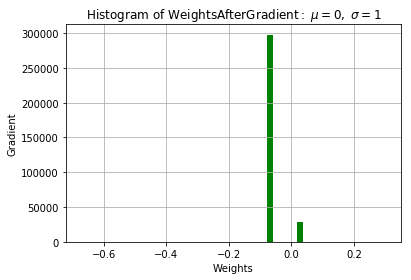

In [5]:
n, bins, patches = plt.hist(evaluated_gradients,10,facecolor='green')
mu, sigma = 0, 1
y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins,y, 'r--', linewidth=1)
plt.xlabel('Weights')
plt.ylabel('Gradient')
plt.title(r'$\mathrm{Histogram\ of\ Weights After Gradient:}\ \mu=0,\ \sigma=1$')
plt.grid(True)
#plt.axis([min(bins),max(bins),0, max(n)])


C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '$\\mathrm{Histogram\\ of\\ Weights Before Gradient:}\\ \\mu=0,\\ \\sigma=1$')

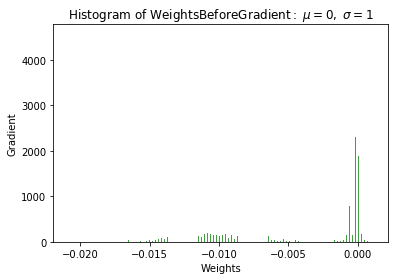

In [6]:
n, bins, patches = plt.hist(evaluated_gradients1,100, normed=1, facecolor='green', alpha=0.75)
mu, sigma = 0, 1
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Weights')
plt.ylabel('Gradient')
plt.title(r'$\mathrm{Histogram\ of\ Weights Before Gradient:}\ \mu=0,\ \sigma=1$')

c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.

In [ ]:
model.add(Dense(nh, kernel_initializer='uniform',activation='relu')) #uniform
...
or
...
model.add(Dense(nh, kernel_initializer='he_uniform',activation='relu')) #he

f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**' y que es continua derivable (**softplus**) ¿Cuál es el beneficio de ésta con respecto ReLU? Comente.

In [ ]:
model.add(Dense(nh, kernel_initializer='he_uniform',activation='softplus')) #softplus

h) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='choose',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='choose',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.values, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled.values, y_val_scaled))